# Exploración de datos (EDA)

**Proyecto:** Análisis de comportamiento de clientes en un _e-commerce_

**Autor:** Sergio Naranjo Burgo

---

## Objetivo

Este _notebook_ resume los principales KPIs y conclusiones obtenidas a partir del análisis exploratorio de datos del _e-commerce_.

El objetivo es traducir los resultados técnicos en **_insights_ accionables de negocio**.

In [1]:
# Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rutas de archivos
ruta_processed = "../data/processed/online_retail_clean.csv"   # CSV limpio

# Estilo profesional para gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## 1.- Carga de datos

Se carga el conjunto de datos limpio desde 'data/processed/online_retail_clean.csv'.

In [2]:
# Cargar dataset limpio
df = pd.read_csv(ruta_processed)

# Convertir fecha
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Crear variable de ventas
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 2.- KPIs principales

Se calculan los indicadores clave del negocio.

In [3]:
kpis = {
    "Clientes únicos": df['CustomerID'].nunique(),
    "Pedidos únicos": df['InvoiceNo'].nunique(),
    "Productos únicos": df['StockCode'].nunique(),
    "Ventas totales (£)": round(df['TotalPrice'].sum(), 2),
    "Ticket medio (£)": round(df.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)
}

for kpi, valor in kpis.items():
    print(f"{kpi}: {valor}")

Clientes únicos: 4330
Pedidos únicos: 18477
Productos únicos: 3663
Ventas totales (£): 8427486.56
Ticket medio (£): 456.11


## 3.- Análisis de clientes (Regla 80/20)

Se analiza si una pequeña parte de los clientes genera la mayor parte de las ventas.

In [4]:
ventas_cliente = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

ventas_cliente_cumsum = ventas_cliente.cumsum() / ventas_cliente.sum()

porcentaje_clientes = ventas_cliente_cumsum[ventas_cliente_cumsum <= 0.8].count() / len(ventas_cliente) * 100

print(f"El {porcentaje_clientes:.2f}% de los clientes genera el 80% de las ventas.")

El 27.14% de los clientes genera el 80% de las ventas.


## 4.- Clientes VIP

Se identifican los clientes con mayor contribución a las ventas totales.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_16056\3014878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_vip.values, y=clientes_vip.index, palette="viridis")


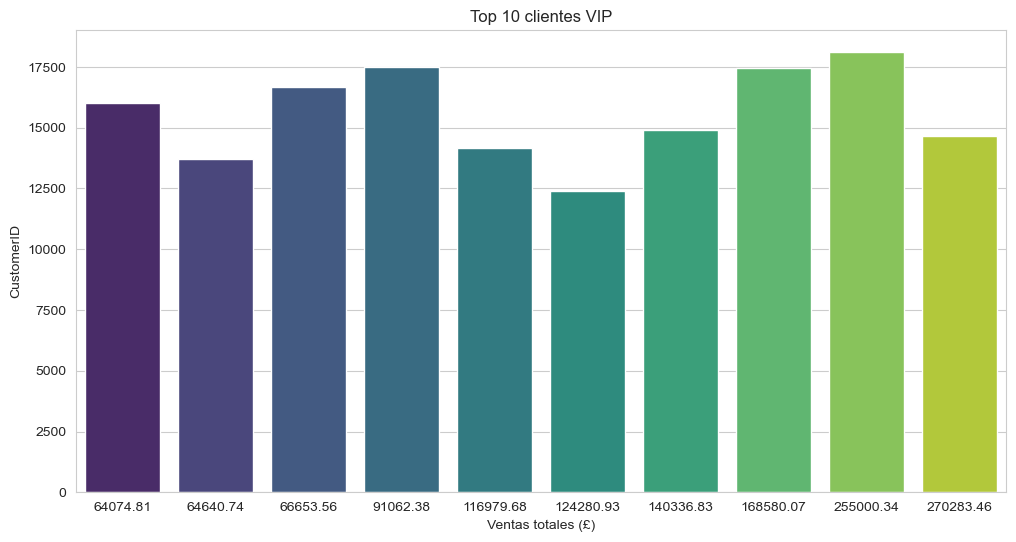

In [5]:
clientes_vip = ventas_cliente.head(10)

sns.barplot(x=clientes_vip.values, y=clientes_vip.index, palette="viridis")
plt.title("Top 10 clientes VIP")
plt.xlabel("Ventas totales (£)")
plt.ylabel("CustomerID")
plt.show()

## 5.- Estacionalidad de ventas

Se analiza la evolución mensual de las ventas.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_16056\460499270.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()


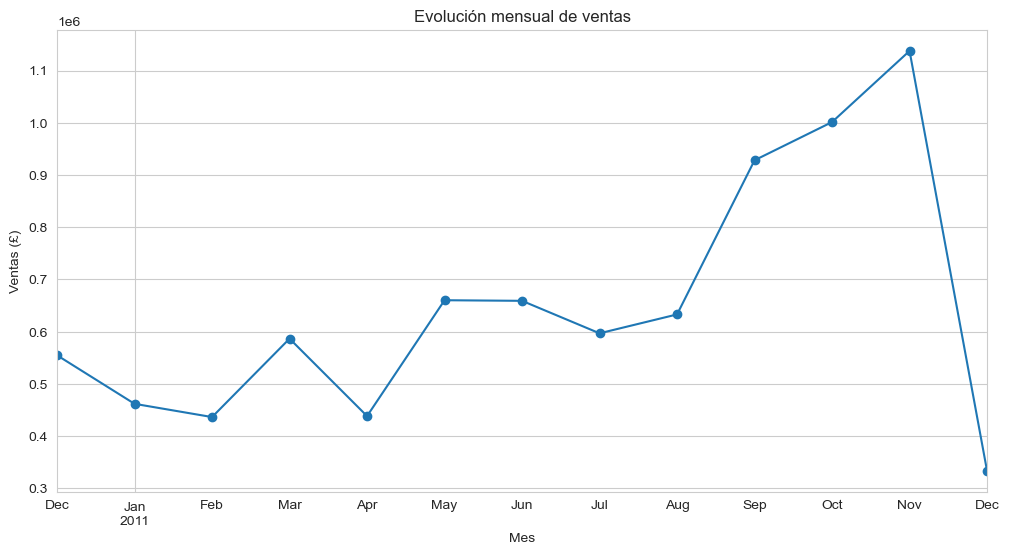

In [6]:
ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

ventas_mensuales.plot(marker='o')
plt.title("Evolución mensual de ventas")
plt.xlabel("Mes")
plt.ylabel("Ventas (£)")
plt.show()

## Conclusiones finales

- El e-commerce presenta un volumen de ventas elevado (£8,4M) con un número moderado de clientes únicos (4.330), lo que sugiere una base de clientes relativamente consolidada.
- El ticket medio es alto (£456), indicando que los clientes suelen realizar compras de varios productos o pedidos de valor elevado.
- El análisis de concentración de ventas confirma la regla 80/20: aproximadamente el 27 % de los clientes genera el 80 % de los ingresos.
- Existe un grupo claro de clientes VIP que contribuyen de forma desproporcionada al negocio, lo que abre oportunidades para estrategias de fidelización y retención.
- La estacionalidad observada en las ventas sugiere picos de demanda en determinados periodos del año, lo que puede ser utilizado para optimizar campañas de marketing y gestión de inventario.

En conjunto, este proyecto demuestra cómo el análisis de datos permite identificar patrones clave de comportamiento de clientes y apoyar la toma de decisiones estratégicas en un entorno de e-commerce.
